# Хоть потоп

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

### Библиотеки

Импортируем библиотеки pandas.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

И все используемое далее.

In [ ]:
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Отключаем лишние предупреждения
#import warnings
#warnings.filterwarnings('ignore')

### Функции

#### class protection_personal_data_clients

In [ ]:
# protection_personal_data_clients = ppdc
class ppdc:
    '''
    Функция обучает линейную регрессию.
    '''
    def __init__(self, features, target):
        self.model = LinearRegression()
        self.preds = self.model.fit(features, target).predict(features)
        self.score = r2_score(target, self.preds)

#### column_values

In [ ]:
def column_values(data_frame):
    '''
    Функция для визуального поиска артефактов и выбросов в значениях DataFrame
    '''
    for column in data_frame.columns:
        print('\nЗначения столбца', column,':')
        print(data_frame[column].sort_values().unique())

#### float_equality

In [ ]:
def float_equality(a, b, threshold=1e-12):
    '''
    Проверяет равеноство двух float с использованием порога.
    '''
    return np.abs(a - b) < threshold

#### df_info

In [ ]:
def df_info(data_frame):
    '''
    Функция выводящая первичную информацию о DataFrame
    '''
    print('\nРазмер таблицы: {} '.format(data_frame.shape))
    print('\nИнфо:')
    print(data_frame.info())                                            # сколько значений и в каком формате
    print('\nПропусков:')
    print(data_frame.isna().mean().sort_values(ascending=False) * 100)  # подсчёт пропусков в процентах
    print('\ndescribe:')
    display(data_frame.describe())                                      # вдруг чего "на глазок" проявится 
    print('\nДубликатов =', data_frame.duplicated().sum())              # проверим дубликаты

### Таблица

Читаем файл с данными и сохраняем в df.

In [ ]:
path = '/datasets/'
df = pd.read_csv(os.path.join(path, 'insurance.csv'))

Смотрим табличку.

In [ ]:
display(df.columns)
print()
display(df.head())

Index(['Пол', 'Возраст', 'Зарплата', 'Члены семьи', 'Страховые выплаты'], dtype='object')

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


#### Инфо

Посмотрим заполненость таблицы.

In [ ]:
df_info(df)


Размер таблицы: (5000, 5) 

Инфо:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB
None

Пропусков:
Пол                  0.0
Возраст              0.0
Зарплата             0.0
Члены семьи          0.0
Страховые выплаты    0.0
dtype: float64

describe:


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000



Дубликатов = 153


In [ ]:
print('Доля дубликатов было:', df.duplicated().sum()/len(df) * 100,'%')

#Избавимся от дубликатов
df= df.drop_duplicates()
print('Доля дубликатов стало:', df.duplicated().sum())


Доля дубликатов было: 3.06 %
Доля дубликатов стало: 0


Поменяем формат возраста и зарплаты на int, раз они такие и есть.

In [ ]:
df['Возраст'] = df['Возраст'].astype(int)
df['Зарплата'] = df['Зарплата'].astype(int)
df.dtypes

Пол                  int64
Возраст              int64
Зарплата             int64
Члены семьи          int64
Страховые выплаты    int64
dtype: object

#### Анализ данных

Отлавливаем артефакты в данных.

In [ ]:
column_values(df)


Значения столбца Пол :
[0 1]

Значения столбца Возраст :
[18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 65]

Значения столбца Зарплата :
[ 5300  6000  7400  8900  9800 10000 10600 10800 11000 11200 11300 12200
 12900 13000 13200 13300 13400 13500 13800 13900 14100 14300 14400 14500
 14600 14700 15000 15100 15200 15600 15700 15900 16000 16200 16300 16400
 16500 16600 16700 17000 17100 17300 17400 17500 17600 17700 17800 17900
 18100 18200 18300 18400 18600 18700 18800 18900 19000 19100 19200 19300
 19400 19600 19700 19900 20000 20100 20200 20300 20400 20500 20600 20700
 20800 20900 21000 21100 21200 21300 21400 21500 21600 21700 21800 21900
 22000 22100 22200 22300 22500 22600 22700 22800 22900 23000 23100 23200
 23300 23400 23500 23600 23700 23800 23900 24000 24100 24200 24300 24400
 24500 24600 24700 24800 24900 25000 25100 25200 25300 25400 25500 25600
 25700 25800 25900 26000 26100 26200 26300

Посмотрим корреляцию признаков.

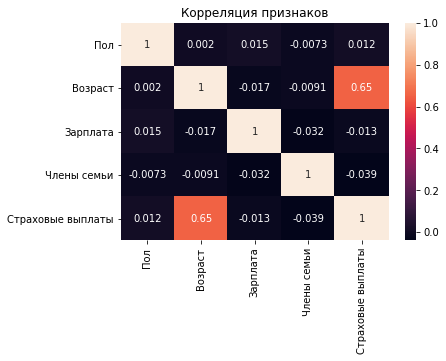

In [ ]:
sns.heatmap(df[['Пол', 'Возраст', 'Зарплата', 'Члены семьи', 'Страховые выплаты']].corr(), annot=True)
plt.title('Корреляция признаков')
plt.show()

Влияние возраста на выплаты на 1-2 порядка сильнее остальных признаков. Построим диаграмму рассеяния:

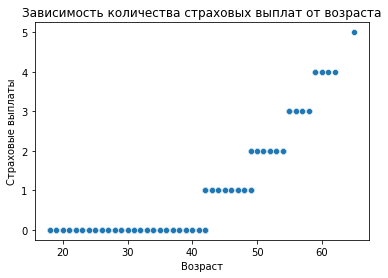

In [ ]:
sns.scatterplot(data=df, x='Возраст', y='Страховые выплаты')
plt.title('Зависимость количества страховых выплат от возраста')
plt.show()

До 43 лет страховка - пустая трата денег?

А чего вообще с выплатами?

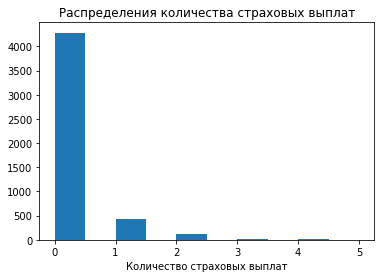

,Количество выплат,%
Страховые выплаты,,
0,4284,88.384568
1,423,8.727048
2,114,2.351970
3,18,0.371364
4,7,0.144419
5,1,0.020631


In [ ]:
plt.hist(df['Страховые выплаты'])
plt.xlabel('Количество страховых выплат')
plt.title('Распределения количества страховых выплат')
plt.show()

df_pivot = pd.pivot_table(df,
                          index=['Страховые выплаты'],
                          values=["Возраст"],
                          aggfunc=len)
df_pivot.rename(columns={'Возраст': 'Количество выплат'}, inplace=True)
df_pivot['%'] = df_pivot['Количество выплат'] / df_pivot['Количество выплат'].sum() * 100
display(df_pivot)
#display(df_pivot.columns)

Дорогая страховочка наверное? Больше 11% выплат.

### Вывод

Имеем всего 5000 значений.

Пропусков нет.

Дубликатов 153.

В значениях аномалий не наблюдается.

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

### Вопрос

Ответьте на вопрос и обоснуйте решение.
Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)

    a. Изменится. Приведите примеры матриц.
    b. Не изменится. Укажите, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.

    
### Ответ 

Предсказания модели не изменится.

Если умножить параметры линейной регрессии на обратимую матрицу, качество линейной регрессии не изменится.

### Обоснование 
    
Формула расчета весов для линейной регрессии:

$$
w = (X^T X)^{-1} X^T y
$$

Новую матрицу признаков $X_n$ представим как произведение старой $X$ на обратимую матрицу $P$:

$$
X_n = XP
$$

Подставим новое значение $X_n$ в формулу расчета весов:

$$
w_n = ((XP)^T XP)^{-1} (XP)^T y
$$

Т.к. $(XP)^T = X^T P^T$ получаем:

$$
w_n = (X^T P^T XP)^{-1} X^T P^T y
$$

Перегруппируем множители и раскроем скобки:

$$
w_n = (P (X^T X) P^T)^{-1} P^T X^T y
$$

$$
w_n = P^{-1} (X^T X)^{-1} (P^T)^{-1} P^T X^T y
$$

Так как $P$ обратимая матрица, то произведение $(P^T)^{-1} P^T$ равно единичной матрице $E$:

$$
w_n = P^{-1} (X^T X)^{-1} E X^T y
$$

$$
w_n = P^{-1} (X^T X)^{-1} X^T y
$$

Справа получилась формула для расчета весов:

$$
w_n = P^{-1} (X^T X)^{-1} X^T y
$$

$$
w_n = P^{-1} w
$$


Формула для предсказаний линейной регрессии:

$$
a = X w
$$

Подставим в эту формулу значения $X_n$ и $w_n$ для вычисления предсказания модели $a_n$:

$$
a_n = X_n w_n
$$

$$
a_n = X P P^{-1} w
$$

Так как $P$ обратимая, то $P P^{-1}$ = $E$:

$$
a_n = X E w
$$

$$
a_n = X w
$$

$$
a_n = a
$$

Получается, что предсказания $a_n$ для матрицы признаков, умноженных на обратимую матрицу $P$ равны предсказаниям $a$.

Параметры линейной регрессии в исходной $w$ и преобразованной $w_n$ связаны следующим образом:

$$
w_n = P^{-1} w
$$

## Алгоритм преобразования

	3. Предложите алгоритм преобразования данных для решения задачи. Обоснуйте, почему качество линейной регрессии не поменяется.

### Алгоритм

1.   Разделить данные на признаки и целевой признак.
2.   Зафиксировать качество регрессии на исходных данных.
3.   Создать произвольную квадратную матрицу для преобразования признаков. (Обеспечить повторяемость опыта.)
4.   Получить новые признаки через произвольную матрицу.
5.   Обучить линейную регрессию на новых признаках.
6.   Провести сравнение качества моделей до и после преобразования.

### Обоснование

Математическое обоснование приведено в "Умножение матриц".

Проверка обоснования приведена в "Проверка алгоритма".

## Проверка алгоритма

	4. Запрограммируйте этот алгоритм, применив матричные операции. Проверьте, что качество линейной регрессии 
	из sklearn не отличается до и после преобразования. Примените метрику R2.

### Реализация алгоритма

Разделим данные на признаки и целевой признак.

In [ ]:
features = df.drop('Страховые выплаты', axis=1)
target = df['Страховые выплаты']

Преобразуем их в векторы.

In [ ]:
features_vector = features.values
target_vector = np.array(target)
features_vector, target_vector

print('\ntarget_vector:\n', target_vector)
print('\nfeatures_vector:\n', features_vector)
print('\nРазмер target_vector:', target_vector.shape)
print('\nРазмер features_vector:', features_vector.shape)


target_vector:
 [0 1 0 ... 0 0 0]

features_vector:
 [[    1    41 49600     1]
 [    0    46 38000     1]
 [    0    29 21000     0]
 ...
 [    0    20 33900     2]
 [    1    22 32700     3]
 [    1    28 40600     1]]

Размер target_vector: (4847,)

Размер features_vector: (4847, 4)


Фиксируем качество регрессии на исходных данных.

In [ ]:
r2_X = ppdc(features_vector, target_vector)
r2_X_score = r2_X.score
print('\nНа исходных данных регрессия даёт R2 =', r2_X_score)


На исходных данных регрессия даёт R2 = 0.4302010046633359


Обеспечиваем повторяемость опыта.

In [ ]:
np.random.seed(1980)

Создаем квадратную матрицу для преобразования.

Сторона квадрата равна количеству признаков.

In [ ]:
P = np.random.randint(100, size=(features_vector.shape[1], features_vector.shape[1]))
P

array([[ 0, 43, 99, 17],
       [24, 54, 68, 18],
       [89, 91, 53, 67],
       [65, 36, 49, 18]])

Проверяем P на обратимость.

In [ ]:
try:
    P_inv = np.linalg.inv(P)
    print('\nМатрица обратима\n')
    print(P_inv)
except:
    print('\nМатрица не обратима\n')


Матрица обратима

[[-0.00588291 -0.00428984 -0.00302705  0.02111329]
 [-0.03194705  0.06227876 -0.00387223 -0.01769327]
 [ 0.01757092 -0.01562638 -0.00286364  0.00969072]
 [ 0.037306   -0.06652797  0.02647094 -0.01168066]]


Получаем новые признаки через матрицу P.

In [ ]:
X = features_vector    # это чтобы с теорией одинаковые буквы были
y = target_vector
X_n = X @ P

print('\nРазмер X_n:', X_n.shape)
print('\nX:\n', X[:5])
print('\nX_n:\n', X_n[:5])

# за минусом 153 дубликатов


Размер X_n: (4847, 4)

X:
 [[    1    41 49600     1]
 [    0    46 38000     1]
 [    0    29 21000     0]
 [    0    21 41700     2]
 [    1    28 26100     0]]

X_n:
 [[4415449 4515893 2631736 3323973]
 [3383169 3460520 2017177 2546846]
 [1869696 1912566 1114972 1407522]
 [3711934 3795906 2211626 2794314]
 [2323572 2376655 1385303 1749221]]


Обучим линейную регрессию на новых признаках.

In [ ]:
r2_X_n = ppdc(X_n, y)
r2_X_n_score = r2_X_n.score
print('\nНа измененных данных регрессия даёт R2 =', r2_X_n_score)


На измененных данных регрессия даёт R2 = 0.43020100466335953


### Сравнение качества моделей до и после преобразования

Сравним совпадение r2_X и r2_X_n до 12-го знака после запятой.

In [ ]:
float_equality(r2_X_n_score, r2_X_score)

True

Точность предсказаний не пострадала.

Веса модели, обученной на исходных признаках.

In [ ]:
w_X = r2_X.model.coef_

Веса модели, обученной на изменённых признаках.

In [ ]:
w_X_n = r2_X_n.model.coef_

Умножим матрицу P^-1 на вектор обычных весов и сравним с изменённым вектором весов.

In [ ]:
all(float_equality(P_inv @ w_X, w_X_n))

True

Векторы весов совпали.

## Вывод

Цель проекта достигнута:

    - Разработан и реализован алгоритм преобразования данных клиентов страховой компании «Хоть потоп» так, чтобы по ним было сложно восстановить персональную информацию.
    - Корректность работы алгоритма проверена. Точность результатов работы алгоритма не менее 12 знаков после запятой.